In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
plt.style.use('ggplot') # 设置绘图风格为ggplot

# 传染病模型

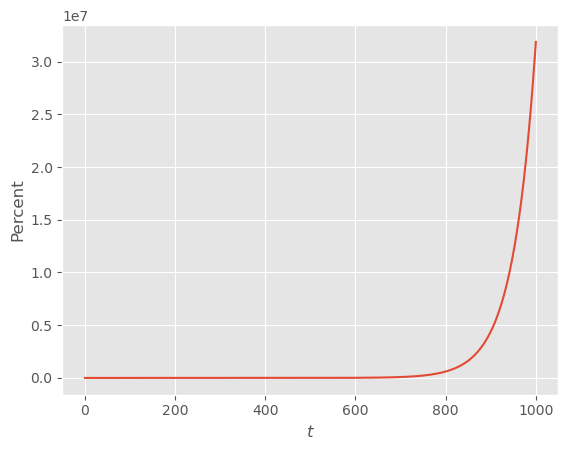

In [3]:
## 指数模型
def exp():
    deltaT = 0.01
    lamb = 2
    i_list = []
    i0 = 0.08; # 初始有的人感染8%
    i_list.append(i0) # 输入i0
    Tot_Time = 10
    TotStep = int(Tot_Time/deltaT) # 表示取整int
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT
        i_list.append(i_new) # 输入，进入循环i_new
    plt.plot(i_list)
    plt.xlabel(r"$t$") #加横坐标label
    plt.ylabel('Percent') #加纵坐标label
exp()
plt.show()

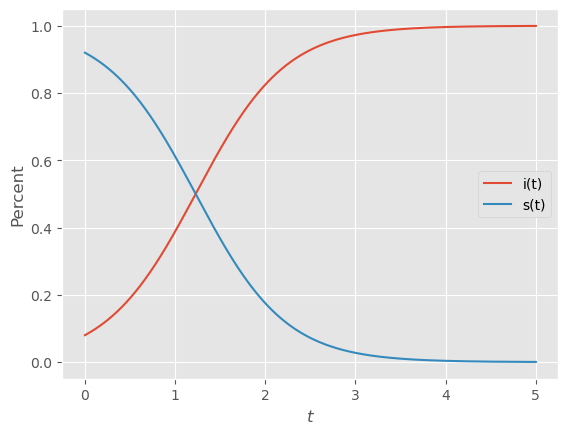

In [4]:
## SI模型
def SI():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    s_list = []
    i0 = 0.08; # 初始有的人感染8%
    i_list.append(i0)
    s_list.append(1 - i0)
    Tot_Time =5
    TotStep = int(Tot_Time/deltaT)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT * s_list[-1]
        i_list.append(i_new)
        s_list.append(1- i_new)
    Time = [i * deltaT for i in range(TotStep + 1)]
    ## 可视化传染过程
    plt.plot(Time,i_list,label = 'i(t)') # 作i(t)图像
    plt.plot(Time,s_list,label = 's(t)') # 作s(t)图像
    plt.xlabel(r"$t$") # 加横坐标label
    plt.ylabel('Percent') # 加纵坐标label
    plt.legend() # 绘图
SI()
plt.show()

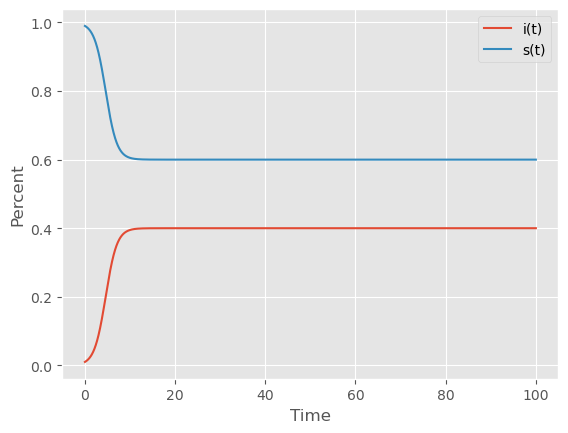

In [5]:
## SIS模型
def SIS():
    i0 = 0.01; # 初始有的人感染1%
    lamb = 2;
    s0 = 1- i0; # 初始未感染人数比例
    mu = 1.2;
    i_list = []
    s_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    TotTime = 100
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep) # 表示取整数int
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu * i_list[-1]*TimeStep
        i_list.append(i_new) # 输入，继续循环i_new
        s_list.append(1-i_new) # 输入(1-i_new)，继续循环
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list) # i(t)
    plt.plot(Time,s_list) # s(t)
    plt.xlabel("Time") # 加横坐标label
    plt.ylabel("Percent") # 加纵坐标label
    plt.legend(["i(t)","s(t)"])
SIS()
plt.show()

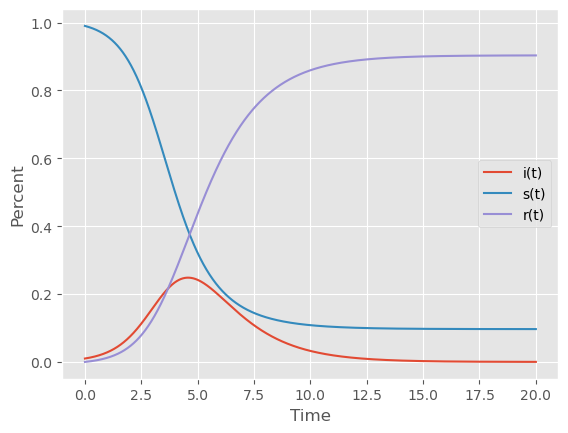

In [6]:
## SIR模型
def SIR():
    i0 = 0.01; # 初始有的人感染1%
    r0 = 0; # 初始没有人免疫
    lamb = 1.8 # 参数
    s0 = 1- i0; # 初始未感染人数比例
    mu = 0.7; # 参数
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    r_list.append(r0) # 输入r0
    TotTime = 20
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep) # 表示取整数int
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu * i_list[-1]*TimeStep
        s_new = s_list[-1] - lamb * s_list[-1] * i_list[-1]*TimeStep
        i_list.append(i_new) # 输入，继续循环i_new
        s_list.append(s_new) # 输入，继续循环s_new
        r_list.append(1-i_new-s_new) # 输入1-i_new-，继续循环s_new
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list) # i(t)
    plt.plot(Time,s_list) # s(t)
    plt.plot(Time,r_list) # r(t)
    plt.xlabel("Time") # 加横坐标label
    plt.ylabel("Percent") # 加纵坐标label
    plt.legend(["i(t)","s(t)","r(t)"]) # 绘图
SIR()
plt.show()

### 结果对比

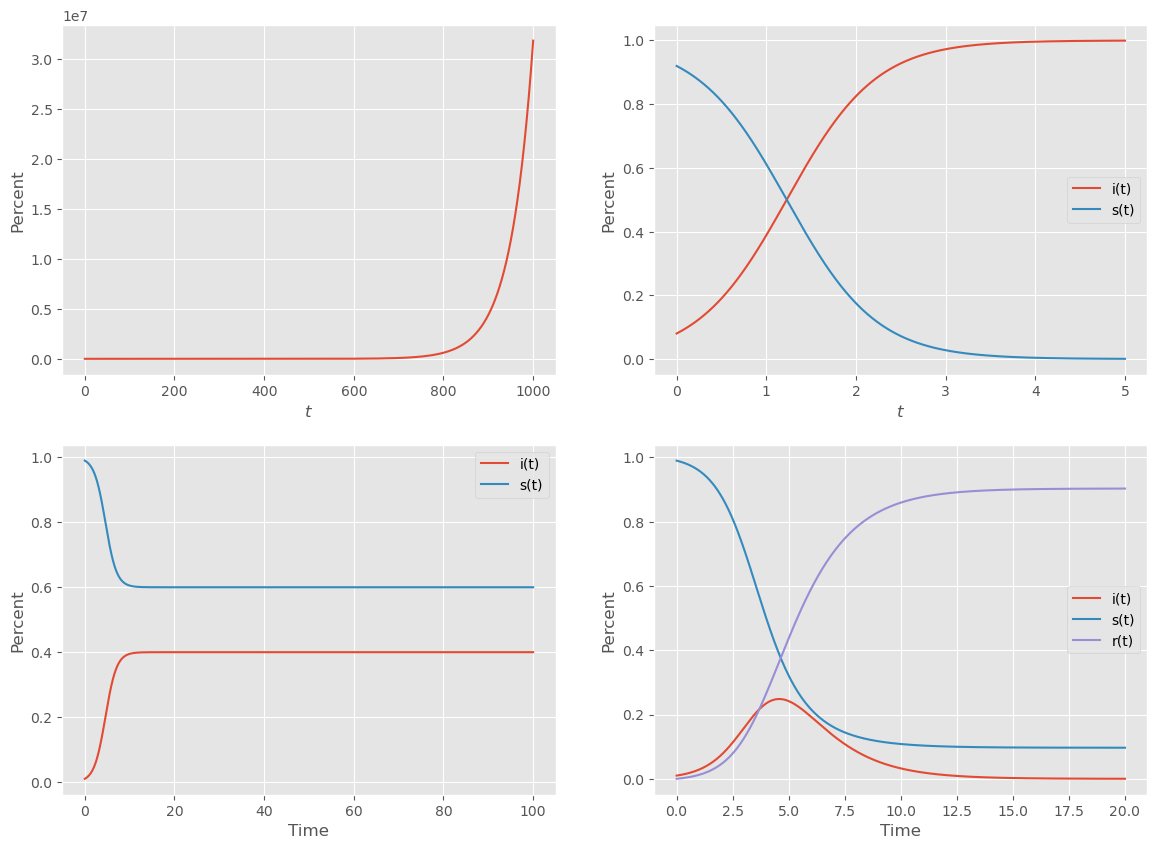

In [7]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
exp()
plt.subplot(2,2,2)
SI()
plt.subplot(2,2,3)
SIS()
plt.subplot(2,2,4)
SIR()

# 猎物-捕食者模型

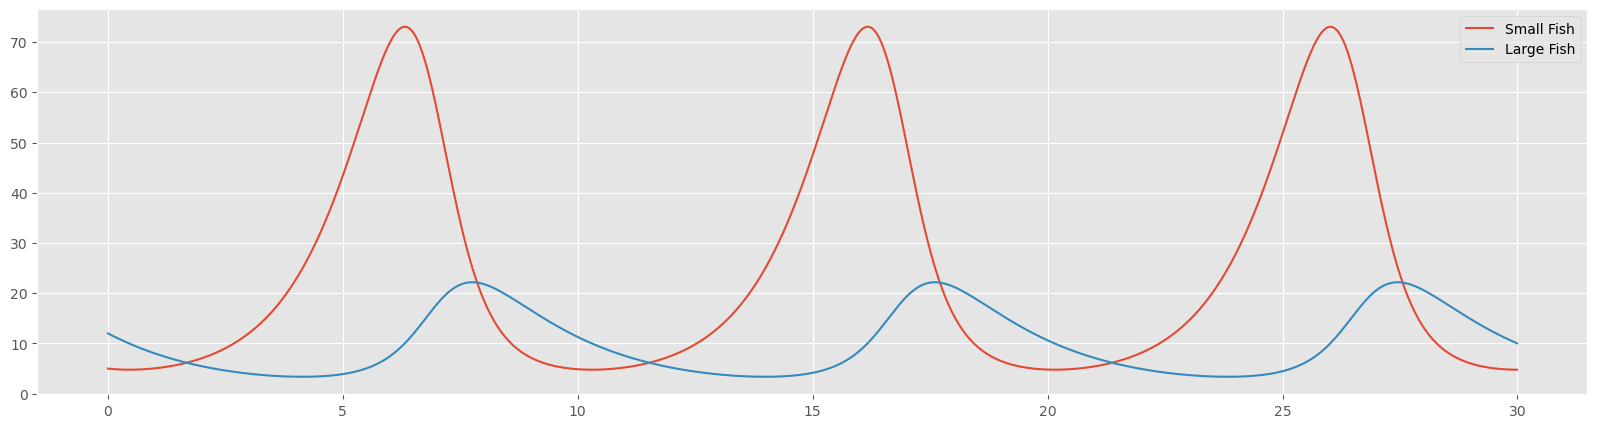

In [8]:
## Volterra 模型的数值求解示例
# 输入初始参数
r = 1
d = 0.5
a = 0.1
b = 0.02
x0 = 5
y0 = 12
deltaT = 0.01
TotTime = 30
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0) # 输入x0
ylist.append(y0) # 输入y0
TimeList = [i*deltaT for i in range(int(timeStep))]
# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] + deltaT * (r *xlist[-1] - a*xlist[-1]*ylist[-1] ) )
    ylist.append(ylist[-1] + deltaT * (-d *ylist[-1] + b*xlist[-1]*ylist[-1] ) )
# 变化过程可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1],label = 'Small Fish')
plt.plot(TimeList,ylist[:-1],label = 'Large Fish')
plt.legend()


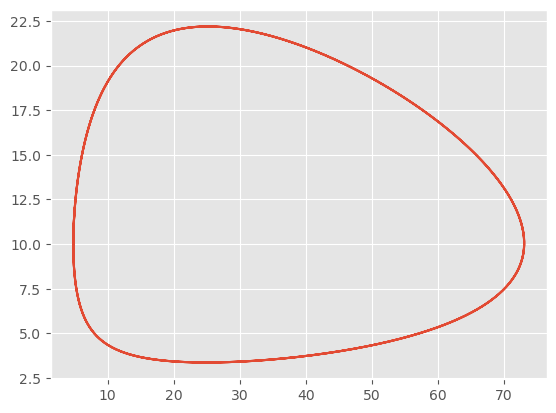

In [9]:
# 绘制相轨线
plt.plot(xlist,ylist)

### 加入logistic项

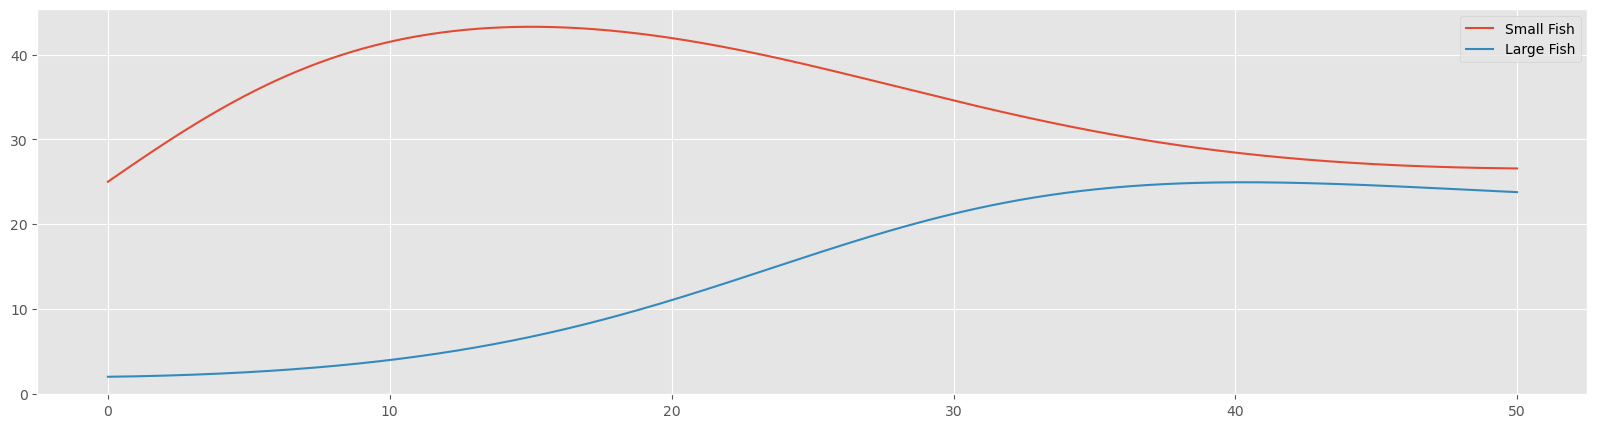

In [11]:
# 输入初始参数
r1 = 0.2
r2 = 0.1
N1 = 50
N2 = 60
sigma1 = 1.2
sigma2 = 2.5
x0 = 25
y0 = 2
deltaT = 0.01
TotTime = 50
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0) # 输入x0
ylist.append(y0) # 输入y0
TimeList = [i*deltaT for i in range(int(timeStep))]

# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] +deltaT * (r1 *xlist[-1])*(1 - xlist[-1]/N1 - sigma1 * ylist[-1]/N2))
    ylist.append(ylist[-1] +deltaT * (r2 *ylist[-1])*(-1 +sigma2* xlist[-1]/N1 - ylist[-1]/N2))
# 结果可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1],label = 'Small Fish')
plt.plot(TimeList,ylist[:-1],label = 'Large Fish')
plt.legend()